In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_csv("archive/online_retail_II.csv");

In [3]:
# Info dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
#Transformar o ID do pedido para String
df['Invoice'] = df['Invoice'].astype('str')
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [5]:
base_itens = (df
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))
base_itens.head()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#substituindo os valores por 0 ou 1 
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

base_sets = base_itens.applymap(encode_units)
base_sets.drop('POSTAGE', inplace=True, axis=1)

base_sets.head()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Rodando o algoritmo FP_Growth
frequent_itemsets = fpgrowth(base_sets, min_support=0.01, use_colnames=True)
display(frequent_itemsets)

D:\OneDrive\Pós Graduação\1º Semestre\Machine Learning\Exercícios\Trabalho Final\venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.046806,(STRAWBERRY CERAMIC TRINKET BOX)
1,0.015784,(SAVE THE PLANET MUG)
2,0.014062,(PINK DOUGHNUT TRINKET POT )
3,0.011246,"(RECORD FRAME 7"" SINGLE SIZE )"
4,0.010476,(15CM CHRISTMAS GLASS BALL 20 LIGHTS)
...,...,...
678,0.011286,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ..."
679,0.011266,"(LUNCH BAG SUKI DESIGN , LUNCH BAG RED RETROSPOT)"
680,0.010435,"(LUNCH BAG BLACK SKULL., LUNCH BAG SUKI DESIGN )"
681,0.011063,"(JUMBO BAG RED RETROSPOT, JUMBO BAG APPLES)"


In [8]:
#Associação entre os produtos
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("Regras de associação geradas:\n")
display(rules)
print("\nDimensões da matriz de regras:", rules.shape)

Regras de associação geradas:



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(STRAWBERRY CERAMIC TRINKET BOX),(WHITE HANGING HEART T-LIGHT HOLDER),0.046806,0.110632,0.014690,0.313853,2.836919,0.009512,1.296177
1,(WHITE HANGING HEART T-LIGHT HOLDER),(STRAWBERRY CERAMIC TRINKET BOX),0.110632,0.046806,0.014690,0.132784,2.836919,0.009512,1.099143
2,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.110632,0.056896,0.015136,0.136813,2.404609,0.008841,1.092584
3,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.056896,0.110632,0.015136,0.266026,2.404609,0.008841,1.211716
4,(WHITE HANGING HEART T-LIGHT HOLDER),(HOME BUILDING BLOCK WORD),0.110632,0.041862,0.015055,0.136081,3.250719,0.010424,1.109060
...,...,...,...,...,...,...,...,...,...
345,(LUNCH BAG SUKI DESIGN ),(LUNCH BAG BLACK SKULL.),0.021984,0.047636,0.010435,0.474654,9.964108,0.009388,1.812832
346,(JUMBO BAG RED RETROSPOT),(JUMBO BAG APPLES),0.066318,0.019816,0.011063,0.166819,8.418241,0.009749,1.176436
347,(JUMBO BAG APPLES),(JUMBO BAG RED RETROSPOT),0.019816,0.066318,0.011063,0.558282,8.418241,0.009749,2.113752
348,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.018499,0.015359,0.011063,0.598028,38.937334,0.010779,2.449530



Dimensões da matriz de regras: (350, 9)


In [9]:
#Função para visualização de dados de regras de associação na mineração de dados
# Função extraida do link:
# https://intelligentonlinetools.com/blog/2018/02/10/how-to-create-data-visualization-for-association-rules-in-data-mining/
import networkx as nx

def draw_graph(rules, rules_to_show):
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
 
   
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

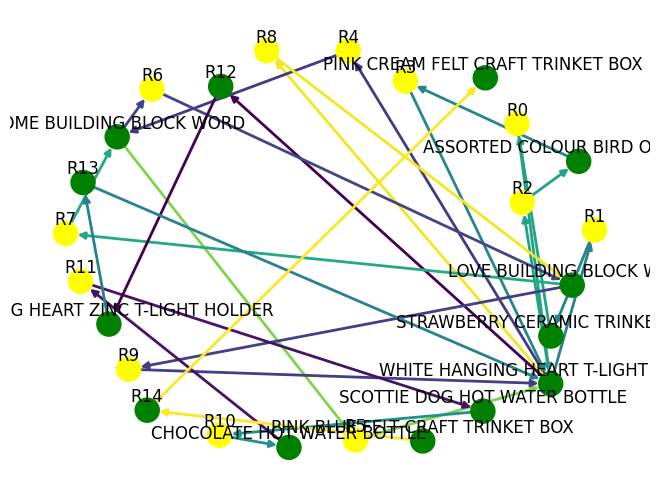

In [15]:
#Chamando a função
draw_graph(rules, 15)